In [34]:
import theano
from theano import tensor as T
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33

In [15]:
X = T.scalar()
Y = T.scalar()

In [16]:
def model(X, w):
    return X * w

In [17]:
w = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w)

In [18]:
print w.get_value()

0.0


In [19]:
cost = T.mean(T.sqr(y - Y))
gradient = T.grad(cost=cost, wrt=w)
updates = [[w, w - gradient * 0.01]]

In [20]:
train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)

In [26]:
costs = []

In [27]:
for x, y in zip(trX, trY):
    costs.append(train(x, y))

In [35]:
df = pd.DataFrame(costs)

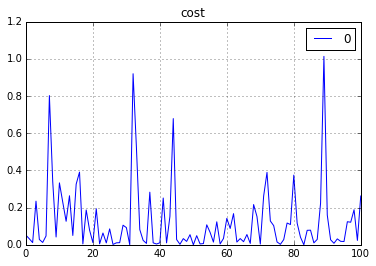

In [38]:
df.plot(title='cost')